In [3]:
import os
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('/content/Admission_Predict_A3.csv')
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [5]:
#checking if there is any missing value present in dataset
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [6]:
#finding number of duplicate values and shape of dataset
print(df.columns)
print(f"Number of duplicates : {df.duplicated().sum()}")
print(f"Shape of data : {df.shape}")

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
Number of duplicates : 0
Shape of data : (500, 9)


In [7]:
# Strip any leading or trailing spaces in column names
# Trailing spaces were present in columns 'LOR' & 'Chance of Admit'
df.columns = df.columns.str.strip()

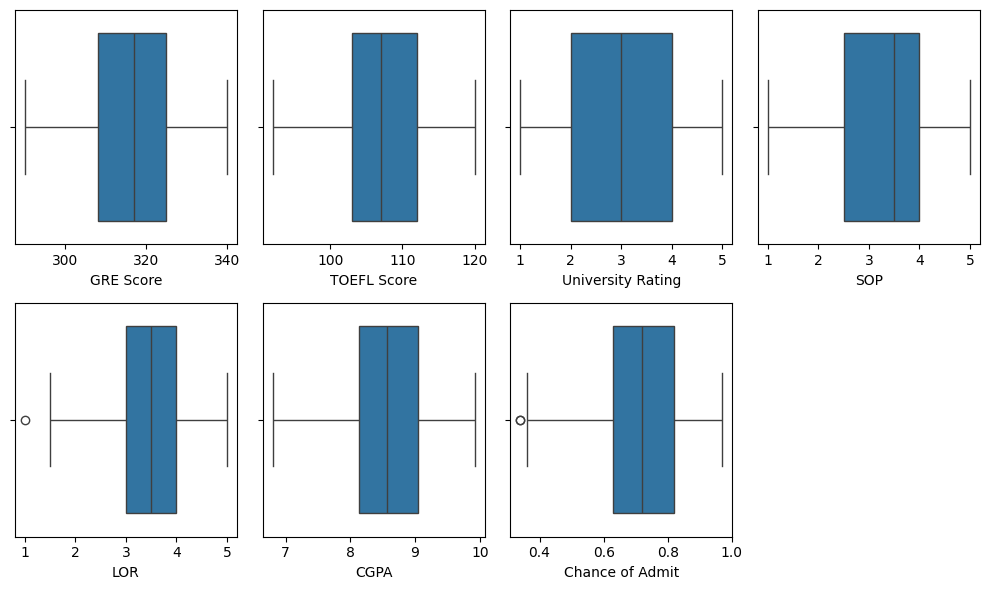

In [8]:
#Boxplot to detect outliers
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']
#no need to plot binary columns in the boxplot as the value is classification and not continuous
plt.figure(figsize=(10, 6))
for i in range(0, 7):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=columns[i], data=df)
    plt.xlabel(columns[i])
    plt.tight_layout()


plt.show()


QUES 2


Most of the features in the dataset are approximately normally distributed, with only slight skewness in a few columns. Therefore, we've opted to apply the Standard Scaler. However, scaling won't have a significant impact on the **Research** and **University Rating** features. Since Research is a binary variable and University Rating is categorical, both exhibit distinct values, making them less sensitive to scaling adjustments.

Feature distributions before scaling:


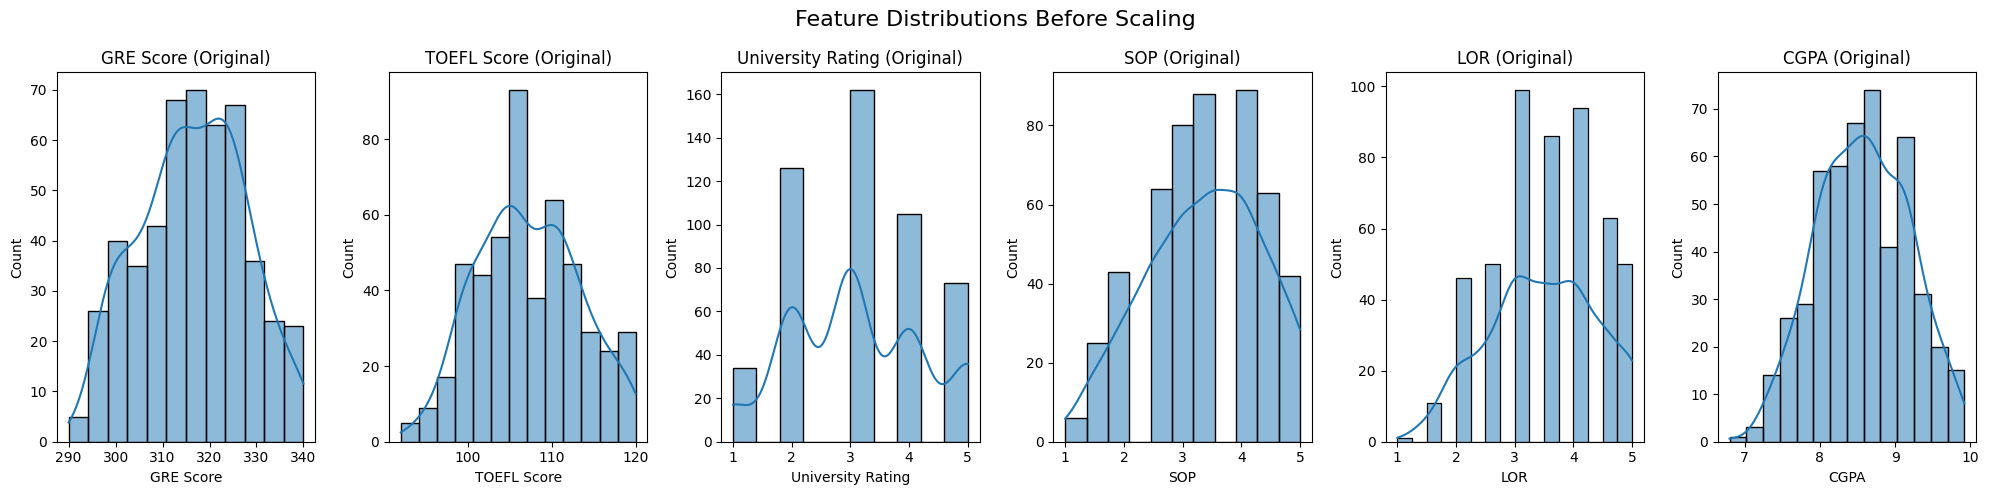

In [9]:
# Define features (X) and target (y)
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']]
y = df['Chance of Admit']


# Visualizing feature distributions before scaling
print("Feature distributions before scaling:")
fig, axes = plt.subplots(1, len(X.columns), figsize=(20, 5))
fig.suptitle('Feature Distributions Before Scaling', fontsize=16)
for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i], kde=True)
    axes[i].set_title(f'{col} (Original)')

plt.tight_layout()
plt.show()


In [10]:

# Function to visualize feature distributions before and after scaling
def visualize_scaling(scaler_name, scaled_features, original_features, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    fig.suptitle(f'Feature Distributions Using {scaler_name}', fontsize=16)

    for i, col in enumerate(columns):
        sns.histplot(scaled_features[:, i], ax=axes[i], kde=True)
        axes[i].set_title(f'{col} (Scaled)')

    plt.tight_layout()
    plt.show()

Applying StandardScaler:


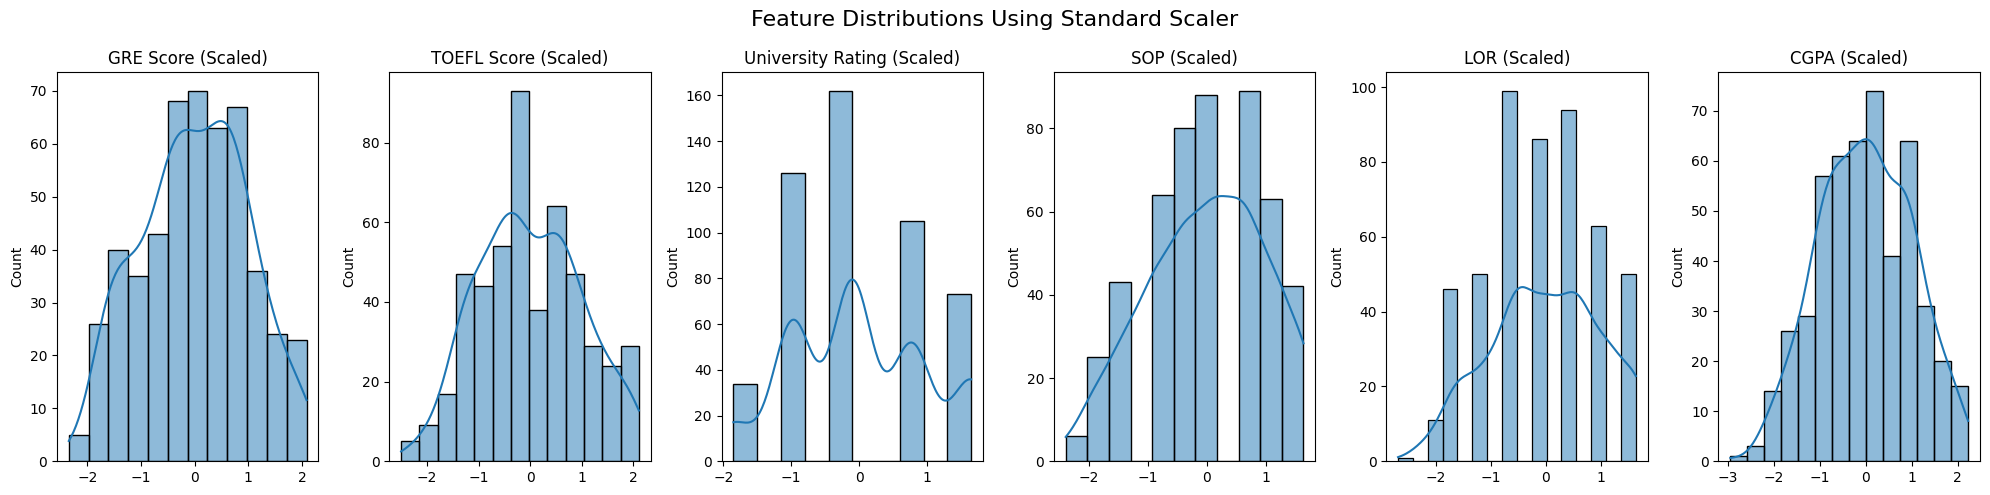

Applying MinMaxScaler:


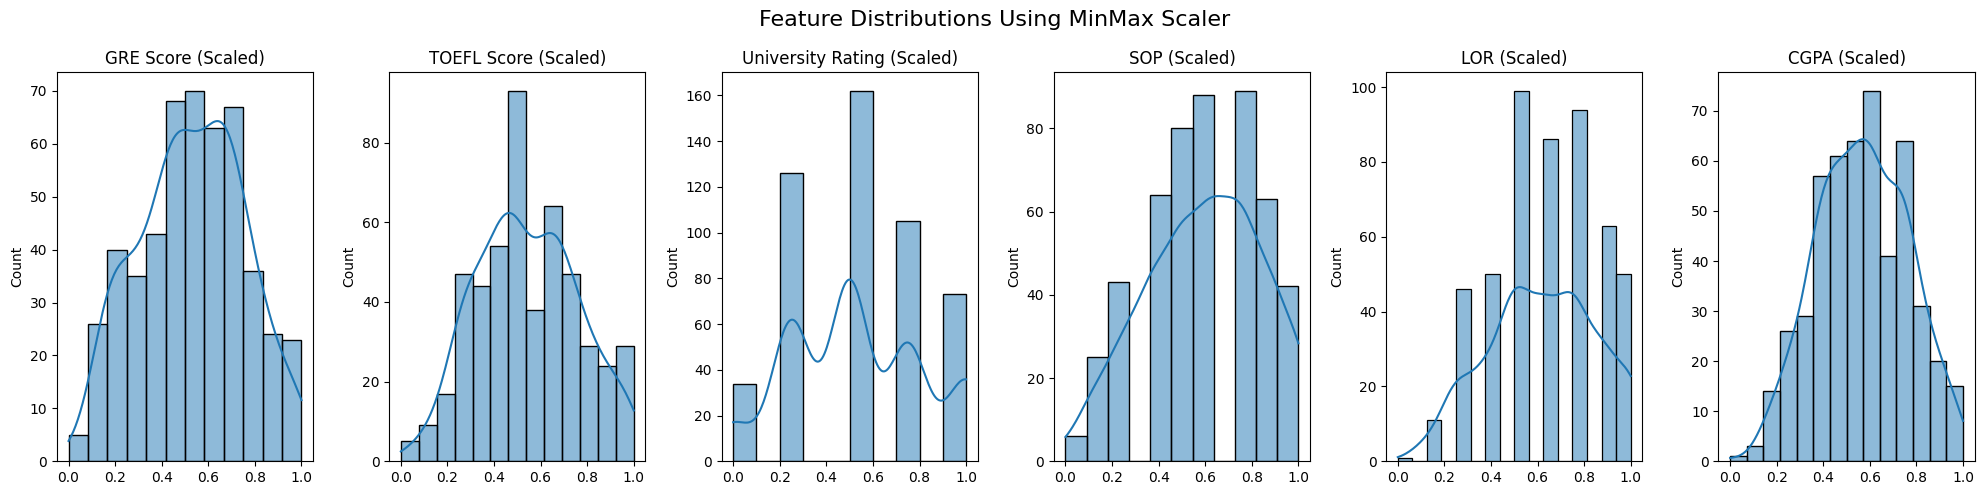

Applying RobustScaler:


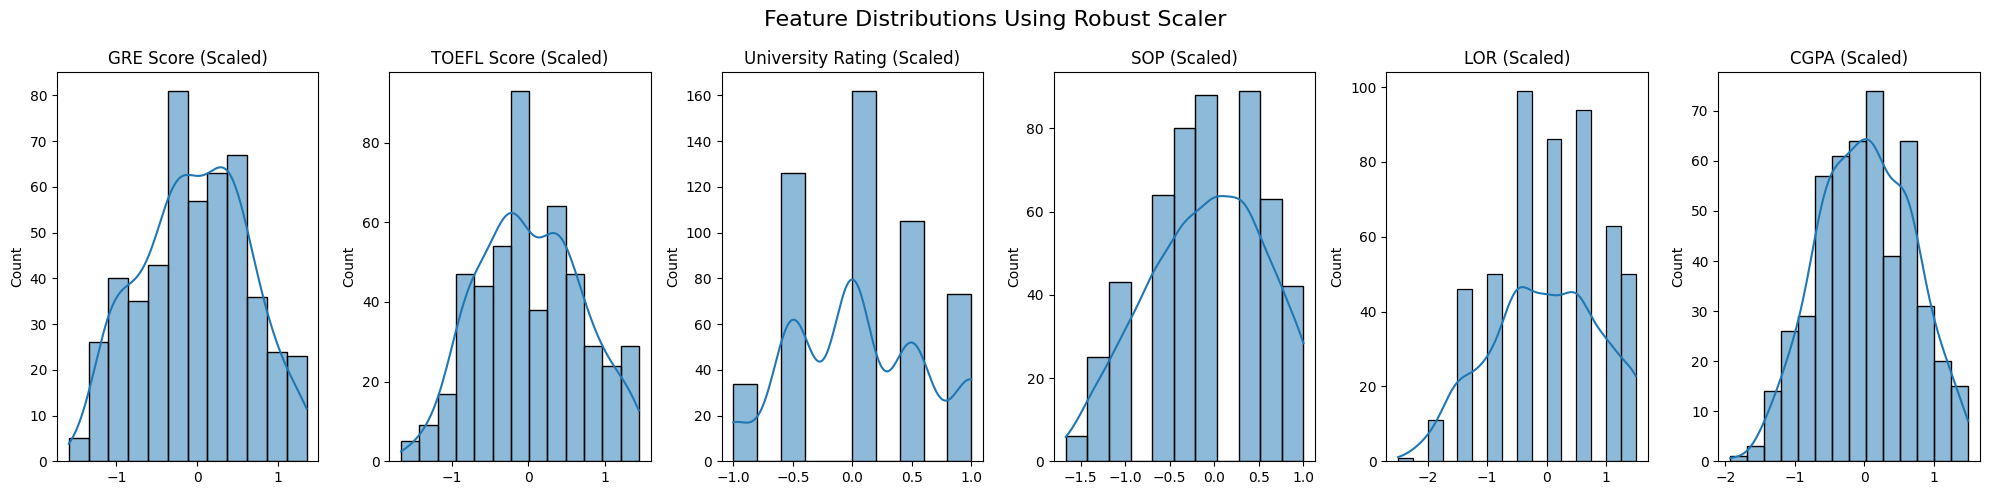

Standard Scaled Data:
   GRE Score  TOEFL Score  University Rating       SOP       LOR      CGPA  \
0   1.819238     1.778865           0.775582  1.137360  1.098944  1.776806   
1   0.667148    -0.031601           0.775582  0.632315  1.098944  0.485859   
2  -0.041830    -0.525364          -0.099793 -0.377773  0.017306 -0.954043   
3   0.489904     0.462163          -0.099793  0.127271 -1.064332  0.154847   
4  -0.219074    -0.689952          -0.975168 -1.387862 -0.523513 -0.606480   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65  


In [11]:

df_scaled1 = df.copy();
X1 = df_scaled1[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']]
y1 = df_scaled1['Chance of Admit']

df_scaled2 = df.copy();
X2 = df_scaled2[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']]
y2 = df_scaled2['Chance of Admit']

df_scaled3 = df.copy();
X3 = df_scaled3[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']]
y3 = df_scaled3['Chance of Admit']

# Standard Scaler #
print("Applying StandardScaler:")
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X1)
visualize_scaling('Standard Scaler', X_standard_scaled, X1, X1.columns)

# MinMax Scaler #
print("Applying MinMaxScaler:")
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X2)
visualize_scaling('MinMax Scaler', X_minmax_scaled, X2, X2.columns)

# Robust Scaler #
print("Applying RobustScaler:")
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X3)
visualize_scaling('Robust Scaler', X_robust_scaled, X3, X3.columns)

# Optionally, you can convert one of the scaled datasets back into a DataFrame
scaled_df = pd.DataFrame(X_standard_scaled, columns=X.columns)
scaled_df['Chance of Admit'] = y.values  # Add 'Chance of Admit' column back to the scaled DataFrame

# Show the first few rows of the scaled DataFrame for verification
print("Standard Scaled Data:")
print(scaled_df.head())

QUES 3

       LDA1      LDA2 Admit Category
0 -3.370090  0.258234           high
1 -1.088007  1.161684         medium
2  1.187024  0.291504         medium
3 -0.313640 -0.930921           high
4  1.246889  0.619628            low
Explained variance ratio for LDA components: [0.98885125 0.01114875]


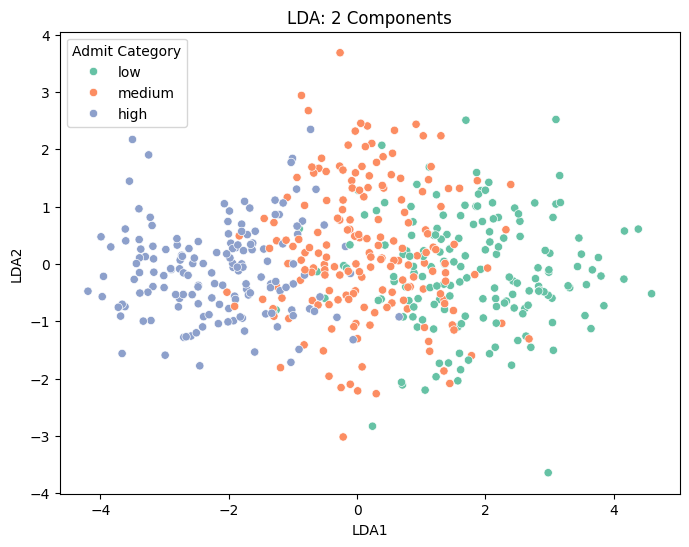

In [12]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']

# Fix the column name to remove the extra space
scaled_df['Admit Category'] = pd.qcut(scaled_df['Chance of Admit'], 3, labels=['low', 'medium', 'high'])

lda = LDA(n_components=2)
# LDA1 and LDA2 (n_components=2) because we only have 3 target classes: low, medium, and high.
# For Linear Discriminant Analysis (LDA), the maximum number of components you can extract is:
#  min(n_features(7), n_classes - 1 (3-1=2) )

lda_components = lda.fit_transform(scaled_df[features], scaled_df['Admit Category'])

lda_df = pd.DataFrame(data=lda_components, columns=['LDA1', 'LDA2'])
lda_df['Admit Category'] = scaled_df['Admit Category']

print(lda_df.head())

explained_variance = lda.explained_variance_ratio_
print(f"Explained variance ratio for LDA components: {explained_variance}")

plt.figure(figsize=(8,6))
sns.scatterplot(x='LDA1', y='LDA2', hue='Admit Category', data=lda_df, palette='Set2')
plt.title('LDA: 2 Components')
plt.show()

QUES 4

Epoch 0, Loss: 1.8421416282653809
Epoch 100, Loss: 0.023391304537653923
Epoch 200, Loss: 0.003918739967048168
Epoch 300, Loss: 0.003666850971058011
Epoch 400, Loss: 0.0036635594442486763
Epoch 500, Loss: 0.0036635163705796003
Epoch 600, Loss: 0.0036635154392570257
Epoch 700, Loss: 0.0036635154392570257
Epoch 800, Loss: 0.0036635154392570257
Epoch 900, Loss: 0.0036635154392570257


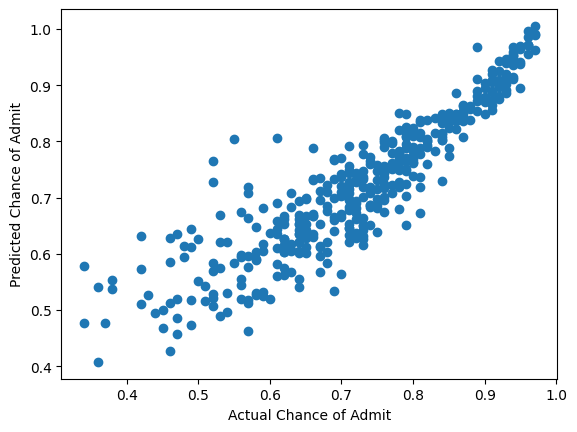

In [13]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(lda_components, df['Chance of Admit'], test_size=0.2, random_state=42)

# Convert data to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)

# Initialize weights and biases
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))

# Linear Regression Model
def linear_regression(x):
    return tf.matmul(x, W) + b

# Mean Squared Error Loss Function
def loss_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training the model
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tf)
        loss = loss_fn(predictions, y_train_tf)
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Predicting and visualizing actual vs predicted values
y_pred_tf = linear_regression(X_train_tf)
plt.scatter(y_train, y_pred_tf.numpy())
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.show()

Mean Squared Error: 0.003619747566852764


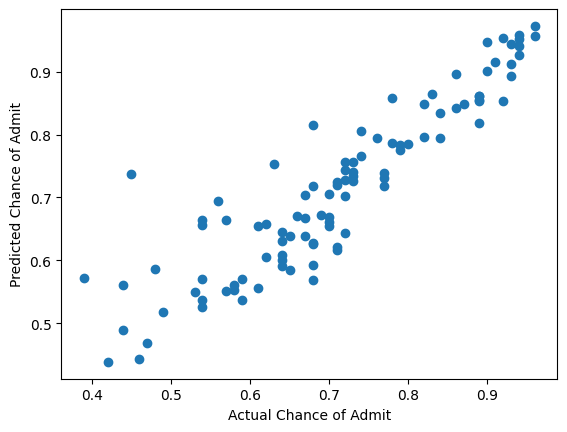

intercept : 0.722795258854959
coefficients : [-0.06803214  0.00549475]


In [14]:
# Linear Regression using Scikit-Learn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)

# Visualize Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.show()
m = lr_model.intercept_
print("intercept :",m)
n = lr_model.coef_
print("coefficients :",n)

QUES 5

In [15]:
# Re-bin the "Chance of Admit" into three categories: Low, Medium, High

df['Admit Category'] = pd.cut(df['Chance of Admit'], bins=[0.3, 0.5, 0.7, 1.0], labels=['Low', 'Medium', 'High'])
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']]
y = df['Admit Category'].map({'Low': 0, 'Medium': 1, 'High': 2}).astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement logistic regression using TensorFlow with a fixed learning rate
learning_rate = 0.001  # Fixed learning rate
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predictions on test data for Logistic Regression
y_pred_logreg = model.predict(X_test_scaled)
y_pred_logreg_classes = np.argmax(y_pred_logreg, axis=1)

# Metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg_classes)
precision_logreg = precision_score(y_test, y_pred_logreg_classes, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg_classes, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg_classes, average='weighted')

print(f"Logistic Regression - Accuracy: {accuracy_logreg:.4f}")
print(f"Logistic Regression - Precision: {precision_logreg:.4f}")
print(f"Logistic Regression - Recall: {recall_logreg:.4f}")
print(f"Logistic Regression - F1 Score: {f1_logreg:.4f}")

# Train Random Forest model for comparison
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions on test data for Random Forest
y_pred_rf = rf.predict(X_test_scaled)

# Metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")

# AUC-ROC for Random Forest
y_pred_proba_rf = rf.predict_proba(X_test_scaled)

# Calculate AUC-ROC for each class
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')

print(f"Random Forest - AUC-ROC: {roc_auc_rf:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Logistic Regression - Accuracy: 0.8300
Logistic Regression - Precision: 0.8278
Logistic Regression - Recall: 0.8300
Logistic Regression - F1 Score: 0.8237
Random Forest - Accuracy: 0.8300
Random Forest - Precision: 0.8387
Random Forest - Recall: 0.8300
Random Forest - F1 Score: 0.8242
Random Forest - AUC-ROC: 0.9026


QUES 6

In [16]:
#hyperparameter tuning for logistic regression

In [17]:
def train_and_evaluate(learning_rate, l2_strength):
    """Trains and evaluates the logistic regression model with given hyperparameters."""
    # Build the model
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_strength)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_strength)),
        tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predictions
    y_pred_probs = model.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

    return accuracy, precision, recall, f1, roc_auc



learning_rates = [0.001, 0.01, 0.1]
l2_reg_strengths = [0.001, 0.01, 0.1]


best_params = None
best_f1 = 0
results = []

for lr, l2 in itertools.product(learning_rates, l2_reg_strengths):
    print(f"\nEvaluating with: Learning rate={lr}, L2={l2}")
    # Call the defined function 'train_and_evaluate'
    accuracy, precision, recall, f1, roc_auc = train_and_evaluate(lr, l2)

    results.append({
        'learning_rate': lr,
        'l2_strength': l2,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': roc_auc
    })

    if f1 > best_f1:
        best_f1 = f1
        best_params = (lr, l2)

    print(f"Results: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Display the best hyperparameters
print(f"\nBest Hyperparameters: Learning rate={best_params[0]}, L2={best_params[1]}")


Evaluating with: Learning rate=0.001, L2=0.001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Results: Accuracy: 0.85, Precision: 0.8498031442241968, Recall: 0.85, F1-Score: 0.8479692791485243

Evaluating with: Learning rate=0.001, L2=0.01


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Results: Accuracy: 0.84, Precision: 0.8490940766550523, Recall: 0.84, F1-Score: 0.8284960193838699

Evaluating with: Learning rate=0.001, L2=0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Results: Accuracy: 0.8, Precision: 0.7259983464241422, Recall: 0.8, F1-Score: 0.7605364758698091

Evaluating with: Learning rate=0.01, L2=0.001


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Results: Accuracy: 0.78, Precision: 0.7730598455598455, Recall: 0.78, F1-Score: 0.7744137638062872

Evaluating with: Learning rate=0.01, L2=0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Results: Accuracy: 0.83, Precision: 0.8401038961038961, Recall: 0.83, F1-Score: 0.8192153704555913

Evaluating with: Learning rate=0.01, L2=0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Results: Accuracy: 0.68, Precision: 0.6159817351598172, Recall: 0.68, F1-Score: 0.6262156957149735

Evaluating with: Learning rate=0.1, L2=0.001


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Results: Accuracy: 0.81, Precision: 0.8220689655172413, Recall: 0.81, F1-Score: 0.7919015846538783

Evaluating with: Learning rate=0.1, L2=0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Results: Accuracy: 0.89, Precision: 0.8947439353099731, Recall: 0.89, F1-Score: 0.886274457250067

Evaluating with: Learning rate=0.1, L2=0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Results: Accuracy: 0.76, Precision: 0.6885585585585585, Recall: 0.76, F1-Score: 0.7189405331510595

Best Hyperparameters: Learning rate=0.1, L2=0.01


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


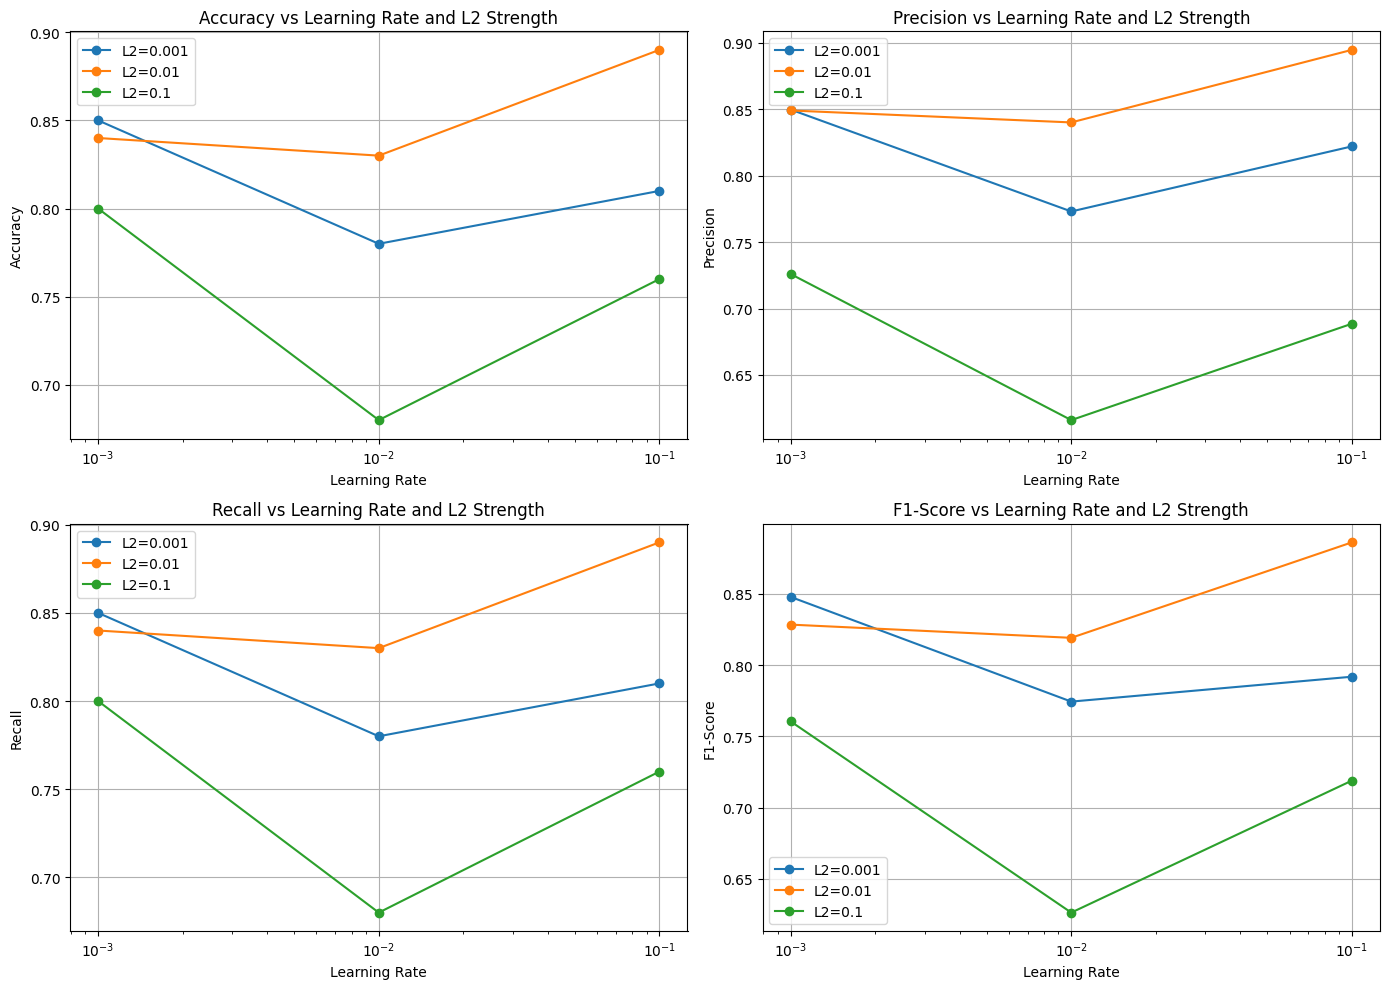

In [18]:
results_df = pd.DataFrame(results)

# Plotting the metrics
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
for l2 in results_df['l2_strength'].unique():
    subset = results_df[results_df['l2_strength'] == l2]
    plt.plot(subset['learning_rate'], subset['accuracy'], marker='o', label=f'L2={l2}')
plt.xscale('log')
plt.title('Accuracy vs Learning Rate and L2 Strength')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Precision
plt.subplot(2, 2, 2)
for l2 in results_df['l2_strength'].unique():
    subset = results_df[results_df['l2_strength'] == l2]
    plt.plot(subset['learning_rate'], subset['precision'], marker='o', label=f'L2={l2}')
plt.xscale('log')
plt.title('Precision vs Learning Rate and L2 Strength')
plt.xlabel('Learning Rate')
plt.ylabel('Precision')
plt.legend()
plt.grid()

# Plot Recall
plt.subplot(2, 2, 3)
for l2 in results_df['l2_strength'].unique():
    subset = results_df[results_df['l2_strength'] == l2]
    plt.plot(subset['learning_rate'], subset['recall'], marker='o', label=f'L2={l2}')
plt.xscale('log')
plt.title('Recall vs Learning Rate and L2 Strength')
plt.xlabel('Learning Rate')
plt.ylabel('Recall')
plt.legend()
plt.grid()

# Plot F1-Score
plt.subplot(2, 2, 4)
for l2 in results_df['l2_strength'].unique():
    subset = results_df[results_df['l2_strength'] == l2]
    plt.plot(subset['learning_rate'], subset['f1_score'], marker='o', label=f'L2={l2}')
plt.xscale('log')
plt.title('F1-Score vs Learning Rate and L2 Strength')
plt.xlabel('Learning Rate')
plt.ylabel('F1-Score')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [19]:
#hyperparameter tuning for linear regression


Evaluating with Learning rate=0.001, L2 Regularization=0.001
Epoch 0: Loss = 1.0614455938339233
Epoch 100: Loss = 0.7886677384376526
Epoch 200: Loss = 0.6321144104003906
Epoch 300: Loss = 0.524541974067688
Epoch 400: Loss = 0.44535353779792786
Test Loss: 0.41999539732933044

Evaluating with Learning rate=0.001, L2 Regularization=0.01
Epoch 0: Loss = 10.943852424621582
Epoch 100: Loss = 3.80161714553833
Epoch 200: Loss = 2.129490852355957
Epoch 300: Loss = 1.5359071493148804
Epoch 400: Loss = 1.207793116569519
Test Loss: 1.1391679048538208

Evaluating with Learning rate=0.001, L2 Regularization=0.1
Epoch 0: Loss = 11.636177062988281
Epoch 100: Loss = 6.486594200134277
Epoch 200: Loss = 4.420262813568115
Epoch 300: Loss = 3.2440712451934814
Epoch 400: Loss = 2.4631123542785645
Test Loss: 1.9237931966781616

Evaluating with Learning rate=0.01, L2 Regularization=0.001
Epoch 0: Loss = 2.202681303024292
Epoch 100: Loss = 0.5540566444396973
Epoch 200: Loss = 0.22660307586193085
Epoch 300: Lo

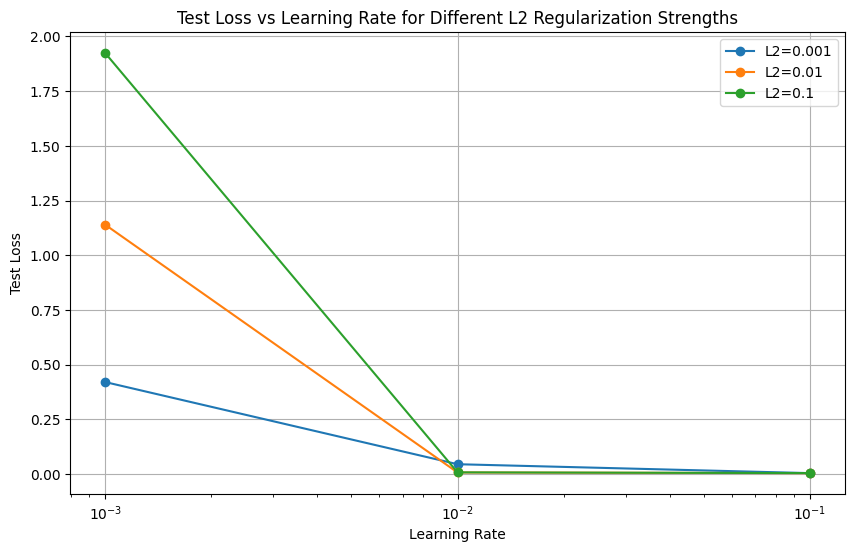

In [20]:
# Data Preprocessing
x = scaled_df.drop(columns=['Chance of Admit', 'Admit Category'], errors='ignore') #Using error='ignore' to avoid KeyError
y = scaled_df['Chance of Admit'] #If the column is named 'Chance of Admit'


x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train = np.array(x_train)
y_train = np.array(Y_train)

X_test = np.array(x_test)
y_test = np.array(Y_test)

# Convert data to TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32)

X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test.reshape(-1, 1), dtype=tf.float32)

# Define linear regression model with regularization
def linear_regression(X, weights, bias):
    return tf.matmul(X, weights) + bias

# Define loss function with L2 regularization
def mean_squared_error_with_l2(y_true, y_pred, weights, l2_strength):
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    l2_loss = l2_strength * tf.nn.l2_loss(weights)
    return mse_loss + l2_loss

# Hyperparameter grid for tuning
learning_rates = [0.001, 0.01, 0.1]
l2_reg_strengths = [0.001, 0.01, 0.1]

# Function to train and evaluate model for given hyperparameters
def train_and_evaluate(learning_rate, l2_strength):
    weights = tf.Variable(tf.random.normal([X_train.shape[1], 1]))
    bias = tf.Variable(tf.random.normal([1]))

    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)
    epochs = 500

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = linear_regression(X_train_tensor, weights, bias)
            loss = mean_squared_error_with_l2(y_train_tensor, y_pred, weights, l2_strength)

        gradients = tape.gradient(loss, [weights, bias])
        optimizer.apply_gradients(zip(gradients, [weights, bias]))

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Loss = {loss.numpy()}')

    # Evaluate on test data
    y_pred_test = linear_regression(X_test_tensor, weights, bias)
    test_loss = mean_squared_error_with_l2(y_test_tensor, y_pred_test, weights, l2_strength).numpy()

    return test_loss

# Grid search for hyperparameter tuning
best_params = None
best_loss = float('inf')
results = []

for lr, l2 in itertools.product(learning_rates, l2_reg_strengths):
    print(f"\nEvaluating with Learning rate={lr}, L2 Regularization={l2}")
    test_loss = train_and_evaluate(lr, l2)
    results.append({
        'learning_rate': lr,
        'l2_strength': l2,
        'test_loss': test_loss
    })
    print(f"Test Loss: {test_loss}")

    if test_loss < best_loss:
        best_loss = test_loss
        best_params = (lr, l2)

# Display the best hyperparameters
print(f"\nBest Hyperparameters: Learning rate={best_params[0]}, L2={best_params[1]} with Loss={best_loss}")

# Visualization of results
results_df = pd.DataFrame(results)

# Plotting the results
plt.figure(figsize=(10,6))
for l2 in results_df['l2_strength'].unique():
    subset = results_df[results_df['l2_strength'] == l2]
    plt.plot(subset['learning_rate'], subset['test_loss'], marker='o', label=f'L2={l2}')

plt.xscale('log')
plt.title('Test Loss vs Learning Rate for Different L2 Regularization Strengths')
plt.xlabel('Learning Rate')
plt.ylabel('Test Loss')
plt.legend()
plt.grid()
plt.show()

In [21]:
#hyperparameter tuning for sk learn linear regression

               Model  fit_intercept  copy_X       MSE
0   LinearRegression           True    True  0.003798
1   LinearRegression           True   False  0.003798
2   LinearRegression          False    True  0.518754
3   LinearRegression          False   False  0.518754
4              Ridge           True    True  0.003805
5              Ridge           True   False  0.003805
6              Ridge          False    True  0.518755
7              Ridge          False   False  0.518755
8              Lasso           True    True  0.020903
9              Lasso           True   False  0.020903
10             Lasso          False    True  0.533880
11             Lasso          False   False  0.533880

Best Model: LinearRegression, Fit Intercept: True, Copy X: True, MSE: 0.003798136700028199


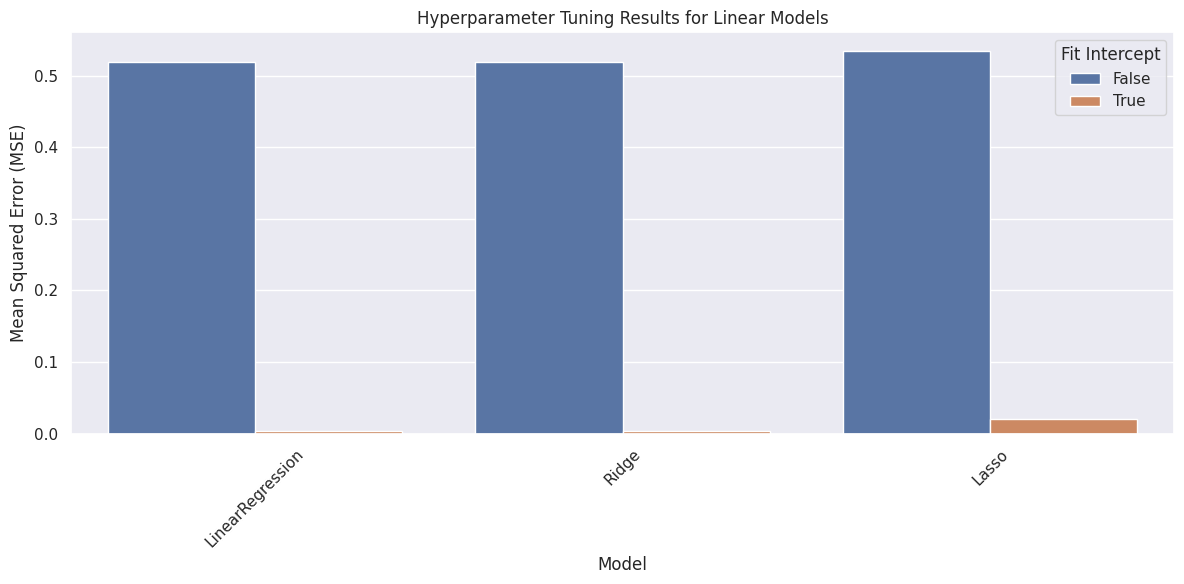

In [22]:
# Data preparation
x = scaled_df.drop(columns=['Chance of Admit', 'Admit Category'])
y = scaled_df['Chance of Admit']

x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

 # Define the model
model = LinearRegression()

# Define the hyperparameters grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'model': [LinearRegression(), Ridge(), Lasso()]  # Add models for regularization
}

# Create an empty list to hold results
results = []

# Perform hyperparameter tuning
for model in param_grid['model']:
    for fit_intercept in param_grid['fit_intercept']:
        for copy_X in param_grid['copy_X']:
            # Fit the model with current parameters
            model.set_params(fit_intercept=fit_intercept, copy_X=copy_X)
            model.fit(x_train, Y_train)

            # Predict and evaluate
            y_pred = model.predict(x_test)
            mse = mean_squared_error(Y_test, y_pred)

            results.append({
                'Model': model.__class__.__name__,
                'fit_intercept': fit_intercept,
                'copy_X': copy_X,
                'MSE': mse
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Get the best parameters based on MSE
best_result = results_df.loc[results_df['MSE'].idxmin()]
print(f"\nBest Model: {best_result['Model']}, Fit Intercept: {best_result['fit_intercept']}, Copy X: {best_result['copy_X']}, MSE: {best_result['MSE']}")

sns.set(style="darkgrid")

# Create a bar plot for the MSE results
plt.figure(figsize=(12, 6))
# Create a bar plot where each combination of parameters is represented
sns.barplot(x='Model', y='MSE', hue='fit_intercept', data=results_df)

# Enhance plot appearance
plt.title('Hyperparameter Tuning Results for Linear Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(title='Fit Intercept', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

QUES 7

In [23]:
# Function to perform logistic regression training and evaluation
def train_and_evaluate_split(X_train, y_train, X_val, y_val):
    # Initialize the logistic regression model
    log_reg = LogisticRegression()

    # Train the model on the training set
    log_reg.fit(X_train, y_train)

    # Predict probabilities for the validation set
    y_val_pred_probs = log_reg.predict_proba(X_val)

    # Predict class labels for the validation set
    y_val_pred_class = log_reg.predict(X_val)

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred_class)
    precision = precision_score(y_val, y_val_pred_class, average='weighted')
    recall = recall_score(y_val, y_val_pred_class, average='weighted')
    f1 = f1_score(y_val, y_val_pred_class, average='weighted')

    # Binarize the output to calculate AUC-ROC (multi-class)
    y_val_binarized = label_binarize(y_val, classes=[0, 1, 2])
    roc_auc = roc_auc_score(y_val_binarized, y_val_pred_probs, average='weighted', multi_class='ovr')

    return accuracy, precision, recall, f1, roc_auc

# Binning 'Chance of Admit' into three categories ('Low', 'Medium', 'High')
bin_edges = [0.3, 0.5, 0.7, 1.0]
bin_labels = ['Low', 'Medium', 'High']
df['Admit Category'] = pd.cut(df['Chance of Admit'], bins=bin_edges, labels=bin_labels, include_lowest=True)


X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']]
y = df['Admit Category'].map({'Low': 0, 'Medium': 1, 'High': 2}).astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified K-Fold Cross-Validation (5 splits)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics for each fold
fold_metrics = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled, y)):
    print(f"\nFold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Train and evaluate the model for the current fold
    accuracy, precision, recall, f1, roc_auc = train_and_evaluate_split(X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    fold_metrics.append({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': roc_auc
    })

    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC-ROC: {roc_auc:.4f}")



Fold 1
Fold 1 - Accuracy: 0.8300, Precision: 0.8229, Recall: 0.8300, F1 Score: 0.8246, AUC-ROC: 0.9341

Fold 2
Fold 2 - Accuracy: 0.8300, Precision: 0.8257, Recall: 0.8300, F1 Score: 0.8233, AUC-ROC: 0.9390

Fold 3
Fold 3 - Accuracy: 0.7800, Precision: 0.8122, Recall: 0.7800, F1 Score: 0.7645, AUC-ROC: 0.8947

Fold 4
Fold 4 - Accuracy: 0.7800, Precision: 0.7879, Recall: 0.7800, F1 Score: 0.7773, AUC-ROC: 0.9070

Fold 5
Fold 5 - Accuracy: 0.7700, Precision: 0.8036, Recall: 0.7700, F1 Score: 0.7693, AUC-ROC: 0.8870


In [24]:
# Calculate and display average performance across all folds
avg_accuracy = np.mean([m['accuracy'] for m in fold_metrics])
avg_precision = np.mean([m['precision'] for m in fold_metrics])
avg_recall = np.mean([m['recall'] for m in fold_metrics])
avg_f1 = np.mean([m['f1_score'] for m in fold_metrics])
avg_roc_auc = np.mean([m['auc_roc'] for m in fold_metrics])

print("Average Metrics Across Folds:")
print(f"Accuracy: {avg_accuracy:.4f}, Precision: {avg_precision:.4f}, Recall: {avg_recall:.4f}, F1 Score: {avg_f1:.4f}, AUC-ROC: {avg_roc_auc:.4f}")

Average Metrics Across Folds:
Accuracy: 0.7980, Precision: 0.8105, Recall: 0.7980, F1 Score: 0.7918, AUC-ROC: 0.9123
